既存の計算結果を読み込んで実行する。（https://issp-center-dev.github.io/PHYSBO/manual/master/ja/notebook/tutorial_once_mode.html）

In [1]:
import physbo
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_data():
    A = np.asarray(np.loadtxt("data/s5-210.csv", skiprows=1, delimiter=","))
    X = A[:, 0:3]
    y = -A[:,3]
    return X, y

X, y = load_data()
X = physbo.misc.centering(X)

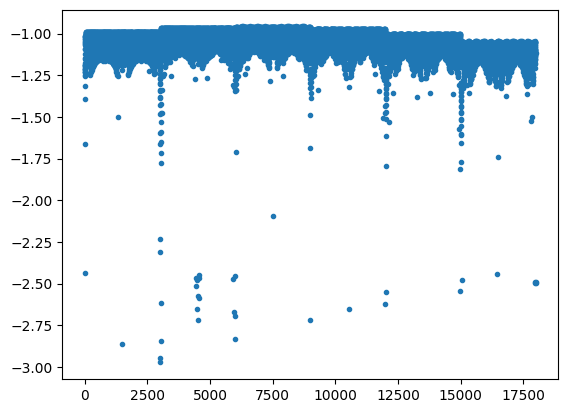

In [3]:
plt.plot(y,".")

In [4]:
# ランダムサーチを行う。

random.seed(0)
calculated_ids = random.sample(range(y.size), 20)
print(calculated_ids)
t_initial = y[calculated_ids]

[12623, 13781, 1326, 8484, 16753, 15922, 13268, 9938, 15617, 11732, 7157, 16537, 4563, 9235, 4579, 3107, 8208, 17451, 4815, 10162]


In [5]:
# policyのセット
policy = physbo.search.discrete.policy(test_X=X, initial_data=[calculated_ids, t_initial])

# シード値のセット
policy.set_seed(0)

In [6]:
class simulator:
    def __call__(self, action):
        return y[action]

In [7]:
res = policy.bayes_search(max_num_probes=100, simulator=simulator(), score="TS", interval=10,  num_rand_basis = 5000)

Start the initial hyper parameter searching ...
Done

Start the hyper parameter learning ...
0 -th epoch marginal likelihood -20.09302189053097
50 -th epoch marginal likelihood -23.11964735598209
100 -th epoch marginal likelihood -24.83020118385076
150 -th epoch marginal likelihood -25.817906570042602
200 -th epoch marginal likelihood -26.42342027124426
250 -th epoch marginal likelihood -26.822598600211865
300 -th epoch marginal likelihood -27.10872736571494
350 -th epoch marginal likelihood -27.33157259912686
400 -th epoch marginal likelihood -27.517235815448124
450 -th epoch marginal likelihood -27.678923335538688
500 -th epoch marginal likelihood -27.822994698270588
Done

0021-th step: f(x) = -1.004361 (action=73)
   current best f(x) = -0.964946 (best action=7157) 

0022-th step: f(x) = -0.966219 (action=5587)
   current best f(x) = -0.964946 (best action=7157) 

0023-th step: f(x) = -1.152277 (action=2764)
   current best f(x) = -0.964946 (best action=7157) 

0024-th step: f(x) = 

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

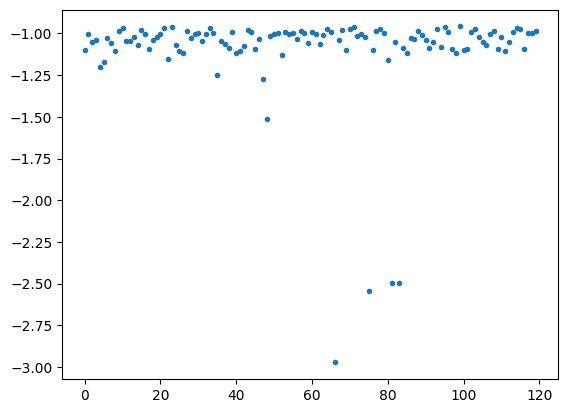

In [ ]:
# 探索点
plt.plot(res.fx[0:res.total_num_search],".")

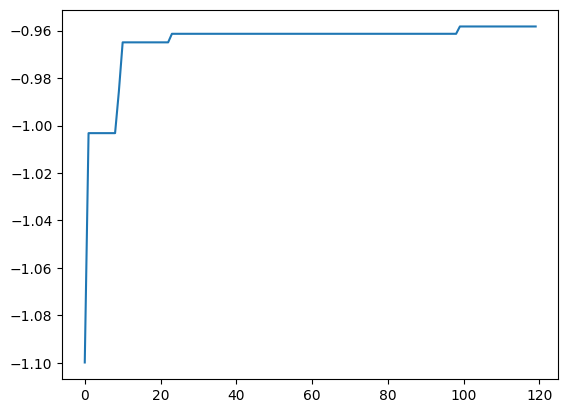

In [ ]:
# 探索中の最大値
best_fx, best_action = res.export_all_sequence_best_fx()
plt.plot(best_fx)
print(best_fx[-1])